<a href="https://colab.research.google.com/github/LamuneGitHub/A001_Python_Test/blob/main/pandas_Test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# import

%matplotlib inline

from IPython.display import display

import re
import math
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import random

import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

#pandas에서 DataFrame을 요약해서 표시하지 않도록 설정
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# 줄 구분 표시 출력 
def print_line() :
  print ("\n------------------------------------------------")
def print_line_m() :
  print ("\n-----------------------")
def print_line_s() :
  print ("\n----------")

"""
# 구글 드라이브 mount
from google.colab import drive
drive.mount('/content/drive')
"""

"\n# 구글 드라이브 mount\nfrom google.colab import drive\ndrive.mount('/content/drive')\n"

In [3]:

# 엑셀 파일 로딩
df_001 = pd.read_excel("https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/stocks/Travel.xlsx", sheet_name = "008770 ")

# CSV 파일 로딩
df_red = pd.read_csv( "https://raw.githubusercontent.com/aniruddhachoudhury/Red-Wine-Quality/master/winequality-red.csv" , sep = ",")
df_white = pd.read_csv( "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv" , sep = ";")
df_movie = pd.read_csv('https://raw.githubusercontent.com/LamuneGitHub/A001_Python_Test/main/data/movie.csv')
df_titanic = sns.load_dataset("titanic")
df_patients = pd.read_csv('https://raw.githubusercontent.com/LamuneGitHub/A001_Python_Test/main/data/patients_info.csv')


df_tmp = pd.read_csv('https://raw.githubusercontent.com/LamuneGitHub/A001_Python_Test/main/data/n133a-dataset.csv', sep=",", header=0)


----
----

In [3]:
df_tmp = pd.read_csv( "https://raw.githubusercontent.com/LamuneGitHub/AI15_Prj_01/main/vgames2.csv" , sep=","  , header=0  , index_col=0 ) 
df_target = df_tmp

In [4]:
# df_target 모든 열에 대해서 값이 Action과 동일한지 여부를 DF로 반환 
df_tmp = df_target == "Action"
df_tmp.head(2)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
1,False,False,False,True,False,False,False,False,False
2,False,False,False,True,False,False,False,False,False


In [6]:
# 특정 열에 대해서 특정 문자열이 포함되어 있는지 여부 반환 ( 대소문자 구분 X)
df_tmp  = df_target['Genre'].str.contains( "act"  , case=False )
df_tmp.head()

1     True
2     True
3    False
4    False
5    False
Name: Genre, dtype: object

In [9]:
# 모든 열에 대해서 특정 문자열이 포함되어 있는지 여부 반환 ( 대소문자 구분 X)
df_tmp  = df_target.query( contains( "act"  , case=False ) )
df_tmp.head()

NameError: name 'contains' is not defined

----
----

# DataFrame 정보 확인


In [3]:
# 데이터 프레임 정보 확인
df_red.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [4]:
# 컬럼별 타입 확인
df_red.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [5]:
# 데이터 프레임의 통계 정보 확인
df_red.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [ ]:
# 컬럼 조회 
columns_tmp = df_red.columns
columns_tmp

# 컬럼 변경
df_red.columns = columns_tmp
df_red.columns


In [ ]:
# 컬럼 이름의 배열 
list ( df_red) 

In [ ]:
# 중복 데이터 여부 확인
# keep = False : 동일한 중복값이 3개 인 경우 False를 지정해 주지 않은 경우 기본설정은 첫번째 중복값은 중복이 아닌것으로 취급되므로 
#                중복데이터 갯수가 2개가 나오게 되므로 
#                중복값이 3개로 반환 될 수 있도록 False 설정을 해준다.
df_target.duplicated(keep = False).sum()

In [4]:
df_target = df_titanic

# 사망자 그룹의 비율 확인
# ,dropna = True : Nan 값도 포함 할지 여부 
df_titanic['survived'].value_counts(normalize=True ,dropna = True)

0    0.616162
1    0.383838
Name: survived, dtype: float64

In [ ]:
# 중복된 항목을 제거한 이후의 data 갯수 조회
len(df_target.drop_duplicates('email'))

# DataFrame 조회

### df1에서 col1 컬럼 전체를 추출

* df1.loc [ :, 'col1' ]
* df1[ 'col1' ] 
* df1.iloc[ :, 0 ]

### df2에서 인덱스가 a인 행을 추출

* df2.iloc [ 0 ] # (0번째 컬럼 = 'a')
* df2.loc [ 'a' ]



In [ ]:
# 조건 조회 : condition 조건 사용 

#: 나이가 없는 사람들 정보 확인 
condition = df_titanic['age'].isnull()

df_check = df_titanic.loc[condition]
df_check.head(3)

In [ ]:
# 다중 조건 조회 : condition 조건 사용 

#: 나이가 없는 사람들 정보 확인 
cond_1 = df_titanic['age'].isnull()
cond_2 = df_titanic['age'].isnull()

df_check = df_titanic.loc[cond_1 & cond_2]
df_check.head(3)

In [ ]:
# Query 를 사용한 조회 : 사망자 , 남성
df_temp = df_titanic.query( "sex == 'male' &  survived == 0 " )
df_temp.head(3)

In [ ]:
# isin 조건 조회

exclude = [ '서울시' , '공원녹지사업소' , '시설관리공단'  ]

# case 01 
df2 = df.query( '자치구 not in @exclude') 

# case 02
#df2=df[(df['자치구']!='서울시')&(df['자치구']!='공원녹지사업소')&(df['자치구']!='시설관리공단')]

# case 03
#excepts = df[df['자치구'].str.contains('서울시|공원녹지사업소|시설관리공단')].index
#df2.drop(excepts, inplace=True)

# case 04
#cond = lambda x : True if x not in exclude else False
#df3 = df[ df['자치구'].apply( cond ) ]

# case 05
#cond = df['자치구'].isin (exclude)
#df2 = df[ ~ cond ]

In [ ]:
# 열 이름으로 조회 => 시리즈
df_red['fixed acidity'].head(3)

In [ ]:
# 행 인덱스로 조회  => DataFrame
df_red.loc[0:2]

In [ ]:
# 행 인덱스로 조회  => DataFrame
df_red.iloc[0:2]

In [ ]:
#index를 이용한 DataFrame 의 조회
df_temp.iloc[0].head() # Series로 반환
df_temp.iloc[[0]] # DataFrame 으로 반환

# 컬럼 index로 조회 
df_temp[0] # 첫번째 열 조회 


In [ ]:
# 간단 조회 []
df_patients[df_patients.몸무게 == 22.14]

In [ ]:
# 간단 조회 loc()
df_patients.loc[ df_patients.몸무게 == 22.14]

In [ ]:
# 간단 조회 query
df_patients.query( "몸무게 == 22.14" )

# Missing Value (결측치)


In [ ]:
# 결측치 갯수 조회
df_movie.isnull().sum() # 각 컬럼별 결측치 갯수 조회
df_movie['Certificate'].isnull().sum() # Certificate 컬럼의 결측치 갯수
df_movie.isnull().sum().sum() # 모든 결측치 갯수 조회

In [ ]:
# 결측치가 있는 모든 컬럼 조회
srs_temp = df_movie.isnull().sum()
srs_temp[ srs_temp > 0 ].index

In [ ]:
# 결측치 채우기
df_red.fillna(0) # 모든 결측치를 0으로 대치
 

In [ ]:
## Nan != Nan 의 성질을 이용하여 결측치 채우기 
df_titanic.loc[df_titanic['age'] != df_titanic['age'], 'age'] = -1

df_titanic.loc[df_titanic['age'] == -1].head(3)

# DataFrame 다루기

In [ ]:
# DF 분리 추출 
#:( 나이 , 사망여부 )
df_temp_survived_age = pd.DataFrame(df_titanic)[['survived', 'age']]
df_temp_survived_age.head(3)

In [ ]:
# DF 분리 추출  
#: patients 테이블에서 환자고유번호와 이름을 가져옵니다.
primary_table = df_patients[['환자고유번호', '이름']]
primary_table.head(3)

In [ ]:
# index 다시 매기기 
df_red = df_red.reset_index( drop = True ) # drop = True를 주지 않으면 기존의 index가 컬럼으로 추가 되면서 새로운 index가 생성된다.
df_red.head(3)

In [ ]:
# 행 열 도치
df_temp = df_001.T

In [ ]:
# 원본 DataFrame copy
patients_copy = df_patients.copy()
patients_copy.head(3)

In [ ]:
# 열 삭제
patients_clean = df_patients_clean.drop('나이', axis='columns' )

# Group by()
* mean() : 평균
* median() : 중간값
* 최빈값

In [ ]:
df_titanic.head(3)

In [ ]:
df_titanic.describe()

In [ ]:
# 생존여부,성별 을 기준으로 좌석등급 중앙값 DF 조회
df_temp = df_titanic.groupby(['survived','sex'] , as_index=False)['pclass','age'].median()
df_temp


In [ ]:
# 생존여부,성별 을 기준으로 좌석등급 중앙값 DF 조회
df_temp = df_titanic.groupby(['survived','sex'] , as_index=True)['pclass','age'].median()
df_temp


# Feature Engineering 

In [ ]:
## 범위에 따라 단계 분류한 값을 age_class 컬럼을 생성하여 입력 
df_temp = df_titanic

bins = [-2, 0, 19, 59, 999]
labels = ['unknown','young', 'middle', 'old']
df_temp['age_class'] = pd.cut(x=df_temp['age'], bins=bins, labels=labels)
df_temp.head(3)

### 각 테이블의 공통된 컬럼명 확인

In [ ]:
# 테이블별 중복 column name 확인
all_columns = pd.Series(list(df_patients) + list(df_insuline_test) + list(df_side_effects))
all_columns
all_columns.duplicated() # 중복여부 배열 
all_columns[all_columns.duplicated()]

### 테이블 합치기


In [ ]:
# (TODO) 테이블 합치기 (수직)

# column의 이름 수정
df_red.rename(columns = {'total_sulfur-dioxide' : 'total_sulfur_dioxide'}, inplace=True)

# 합치려는 데이터셋의 columns가 동일한지 확인
set(df_red.columns) == set(df_white.columns)

# 하나의 데이터셋으로 통합
df = df_white.append(df_red, ignore_index = True)

# 잘 합쳐졌는지 확인
df.shape

In [ ]:

# (TODO) 테이블 합치기 (수퍙)

# (TODO) 컬럼 삭제
# (TODO) 컬럼값 정제
# (TODO) 컬럼 추가
red_color = np.repeat('red', len(df_red))
df_red['color'] = red_color
df_red.head()


In [ ]:


# 파일로 저장
df.to_csv('winequality_edited.csv', index=False)

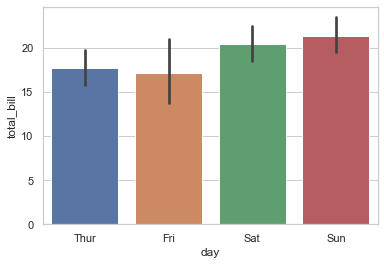

In [5]:
import seaborn as sns
sns.set_theme(style="whitegrid")
tips = sns.load_dataset("tips")
ax = sns.barplot(x="day", y="total_bill", data=tips)

In [6]:
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
5,25.29,4.71,Male,No,Sun,Dinner,4
6,8.77,2.00,Male,No,Sun,Dinner,2
7,26.88,3.12,Male,No,Sun,Dinner,4
8,15.04,1.96,Male,No,Sun,Dinner,2
9,14.78,3.23,Male,No,Sun,Dinner,2
